## Deap


Библиотека Neurokit2

In [7]:
import mne
import os
from tqdm import tqdm_notebook
import neurokit2 as nk
import numpy as np
import pickle
import yasa
from scipy.signal import welch

In [8]:
import warnings
import logging
import pandas as pd
warnings.filterwarnings('ignore')

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
logging.getLogger("mne").setLevel(logging.WARNING)

Порядок каналов из архива

http://www.eecs.qmul.ac.uk/mmv/datasets/deap/readme.html

data	40 x 40 x 8064	video/trial x channel x data

labels	40 x 4	video/trial x label (valence, arousal, dominance, liking)

Описание функции nk.complexity()
https://neurokit2.readthedocs.io/en/latest/functions.html#module-neurokit2.complexity

In [ ]:
n_subjects = 32
n_films = 40
n_channels = 18
ch_order = [18,    2,    3,   6,    7,    15,   10,  11,   13,   14,   31,  28,   29,   23,  24,   25,   19,    20]
ch_names = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
for Subject in tqdm_notebook(range(1 , n_subjects + 1)):
    Subject = ('0' + str(Subject)) if Subject < 10 else str(Subject)
    raw = pickle.load(open('G:/Мой диск/Research/DEAP/s{}.dat'.foramt(Subject), 'rb'), encoding='latin1')
    for film in tqdm_notebook(range(n_films)):
        for channel in tqdm_notebook(range(n_channels)):
            if os.path.isfile('G:/Мой диск/Research/features_deap_neurokit/S_{}_F_{}_{}_.xlsx'.format(Subject, film, ch_names[channel])):
                continue
            # Просмотр начинается с 384 сэмпла
            df, info = nk.complexity(raw['data'][film][ch_order[channel]][384:], which = ['fast', 'medium'])
            
            df['Subj'] =  Subj
            df['film'] = film + 1
            df['ch'] = channel + 1
            df['labels'] = raw['labels'][film][3]
            df.to_excel('G:/Мой диск/Research/Project2022/features_deap_40_128_neurokit/S_{}_F_{}_{}_.xlsx'.format(Subject, film, ch_names[channel]), index=False)

In [ ]:
ch_names = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
neurokit_deap = pd.DataFrame()
for i in tqdm_notebook(range(32)):
    Subject = ('0' + str(i + 1)) if i + 1 < 10 else str(i + 1)
    for j in tqdm_notebook(range(40)):
        for k in tqdm_notebook(range(18)):
            neurokit_deap = pd.concat([neurokit_deap, pd.read_excel('G:/Мой диск/Research/Project2022/features_deap_neurokit/features_deap_40_128_neurokit/S_{}_F_{}_{}_.xlsx'.format(Subject, j, ch_names[k]))], axis=0)

In [7]:
neurokit_deap

,ApEn,CREn,DiffEn,FI,Hjorth,Hurst,KFD,LZC,MSE,MSPEn,...,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn,Subj,film,ch,labels
0,1.484383,-0.007692,2.854492,0.314085,1.522358,0.193281,3.505953,0.742818,0.307039,0.987916,...,1.601542,0.824846,1.408808,12.906891,0.803484,0.999977,1,0,Fz,7.83
0,1.556828,-0.001690,2.903278,0.284743,1.503775,0.211067,3.861489,0.761305,0.302559,0.988604,...,1.616463,0.844913,1.465049,12.906891,0.818364,1.000000,1,0,F3,7.83
0,1.585217,0.004273,2.883640,0.289118,1.580589,0.229094,3.410764,0.784833,0.303804,0.988171,...,1.601818,0.841968,1.506933,12.906891,0.811917,0.999577,1,0,F7,7.83
0,1.636149,0.008965,2.644221,0.280260,1.584523,0.216789,3.376908,0.783152,0.313923,0.987522,...,1.614030,0.847914,1.555134,12.906891,0.817692,0.999983,1,0,C3,7.83
0,1.829717,0.005163,3.007254,0.205972,1.549235,0.241468,3.858740,0.853737,0.290795,0.987040,...,1.630649,0.895176,1.777740,12.906891,0.843627,0.999926,1,0,T7,7.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1.728836,-0.004444,2.797080,0.261082,1.665462,0.247139,3.471880,0.821806,0.317735,0.988659,...,1.606150,0.860561,1.656421,12.906891,0.831258,0.999998,32,39,Cz,1.88
0,1.594800,-0.055830,3.747132,0.335007,2.043562,0.331776,3.409042,0.830209,0.259786,0.987347,...,1.596723,0.810083,1.472948,12.906891,0.760206,0.999763,32,39,C4,1.88
0,1.787636,-0.016016,4.458728,0.209458,1.710900,0.373061,3.496581,0.887349,0.231478,0.986785,...,1.601611,0.893062,1.693747,12.906891,0.794703,0.999678,32,39,T8,1.88
0,1.355464,-0.034910,3.873512,0.439351,2.366161,0.372195,2.859996,0.762985,0.248196,0.987487,...,1.547087,0.730611,1.198213,12.906891,0.711782,0.999992,32,39,F4,1.88


In [8]:
#neurokit_deap.to_csv('features_deap.csv', index=False)

## Датасет из лаборатории

Neurokit2

Рейтинги : по стобцам фильмы, по строчкам испытуемые. У 11 исп. отсутсвуют два рейтинга.

In [3]:
ratings = np.array(
       [
       [10., 10.,  2.,  5.,  9.,  9.,  5.,  9.],
       [10.,  8.,  7.,  9.,  7.,  6.,  6.,  9.],
       [ 6.,  3.,  5.,  6.,  5.,  5.,  5.,  2.],
       [ 8.,  6.,  5.,  9.,  5.,  7.,  4.,  6.],
       [ 3.,  2.,  4.,  1.,  7.,  3.,  7.,  2.],
       [ 7.,  7.,  2.,  8.,  5.,  3.,  2.,  5.],
       [ 9.,  4.,  4.,  3.,  9.,  8.,  8.,  5.],
       [ 5.,  7.,  5.,  9.,  3.,  2.,  8.,  7.],
       [ 8.,  8.,  2.,  3.,  7.,  5.,  5.,  9.],
       [ 3.,  8.,  7.,  3.,  1.,  3.,  6.,  2.],
       [ 8., np.nan,  3.,  5.,  8., np.nan,  6.,  4.],
       [10.,  5.,  6.,  9., 10.,  7.,  8.,  2.]
       ]
)

In [ ]:
n_subjects = 12
n_films = 8
n_channels = 18
channel_names = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
for Subject in tqdm_notebook(range(1, n_subjects + 1)):
    for film in tqdm_notebook(range(1, n_films + 1)):
        if not os.path.isfile('G:/Мой диск/Research/Project2022/Cuts_filtered_40_128/{}/filtered_watch_{}.fif'.format(Subject, film)):
            continue
        if os.path.isfile('G:/Мой диск/Research/Project2022/features_40_128_neurokit/S_{}_F_{}_{}_.xlsx'.format(Subject, film, channel_names[channel])):
            continue
        # читаем просмотр из файла
        
        raw = mne.io.read_raw('G:/Мой диск/Research/Project2022/Cuts_filtered_40_128/{}/filtered_watch_{}.fif'.format(Subject, film))
        
        #удаляем ненужные каналы
        
        if 'VEOG' in raw.ch_names:
            raw.drop_channels(['VEOG'])
        if 'STI' in raw.ch_names:
            raw.drop_channels(['STI'])
        raw.drop_channels(['Pulse', 'Zygom', 'Corr', 'EDA', 'Mark'])
        
        for channel in tqdm_notebook(range(n_channels)):
            if os.path.isfile('G:/Мой диск/Research/Project2022/features_40_128_neurokit/S_{}_F_{}_{}_.xlsx'.format(Subject, film, channel)):
                continue
            df, info = nk.complexity(raw[channel_names[channel]][0][0], which = ['fast', 'medium'])
            df['Subj'] =  Subject
            df['film'] = film
            df['ch'] = channel + 1
            df['labels'] = ratings[Subject - 1][film - 1]
            df.to_excel('G:/Мой диск/Research/Project2022/features_40_128_neurokit/S_{}_F_{}_{}_.xlsx'.format(Subject, film, channel_names[channel]), index=False)

Мощности частот (библиотека Yasa) https://raphaelvallat.com/yasa/build/html/generated/yasa.bandpower_from_psd.html?highlight=bandpower#yasa.bandpower_from_psd

Мы добавляем построчно каждый из каналов

In [ ]:
n_subjects = 12
n_films = 8
n_channels = 18
channel_names = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
for Subject in tqdm_notebook(range(1, n_subjects + 1)):
    frames = []
    frames_rel = []
    for film in tqdm_notebook(range(1, n_films + 1)):
        if not os.path.isfile('G:/Мой диск/Research/Project2022/Cuts_filtered_40_128/{}/filtered_relax_before_{}.fif'.format(Subject, film)):
            continue
        relax = mne.io.read_raw('G:/Мой диск/Research/Project2022/Cuts_filtered_40_128/{}/filtered_relax_before_{}.fif'.format(Subject, film))
        watch = mne.io.read_raw('G:/Мой диск/Research/Project2022/Cuts_filtered_40_128/{}/filtered_watch_{}.fif'.format(Subject, film))
        
        sf = relax.info['sfreq']
        win = int(4 * sf)
        
        if 'VEOG' in relax.ch_names:
            relax.drop_channels(['VEOG'])
            watch.drop_channels(['VEOG'])
        if 'STI' in relax.ch_names:
            relax.drop_channels(['STI'])
            watch.drop_channels(['STI'])
        relax.drop_channels(['Pulse', 'Zygom', 'Corr', 'EDA', 'Mark'])
        watch.drop_channels(['Pulse', 'Zygom', 'Corr', 'EDA', 'Mark'])
        

        freqs_relax, psd_relax = welch(relax.get_data() * 1e6, sf, nperseg=win, average='median')
        freqs_watch, psd_watch = welch(watch.get_data() * 1e6, sf, nperseg=win, average='median')
        
        bp_relax = yasa.bandpower_from_psd(psd_relax, freqs_relax, channel_names, bands=
                                   [(4, 8, 'Theta'), (8, 12, 'Alpha'), (12, 30, 'Beta')], relative=False).drop(columns=['FreqRes', 'Relative', 'TotalAbsPow'])
        bp_watch = yasa.bandpower_from_psd(psd_watch, freqs_watch, channel_names, bands=
                                   [(4, 8, 'Theta'), (8, 12, 'Alpha'), (12, 30, 'Beta')], relative=False).drop(columns=['FreqRes', 'Relative', 'TotalAbsPow'])
        bp_ratio_relax = yasa.bandpower(relax, relax.info['sfreq'], bands=
                                   [(4, 8, 'Theta_ratio'), (8, 12, 'Alpha_ratio'), (12, 30, 'Beta_ratio')], relative=True).drop(columns=['FreqRes', 'Relative'])
        bp_ratio_watch = yasa.bandpower(watch, watch.info['sfreq'], bands=
                                   [(4, 8, 'Theta_ratio'), (8, 12, 'Alpha_ratio'), (12, 30, 'Beta_ratio')], relative=True).drop(columns=['FreqRes', 'Relative'])

        for channel in tqdm_notebook(range(n_channels)):
            df_relax = pd.DataFrame(bp_relax.loc[channel]).transpose()
            df_watch = pd.DataFrame(bp_watch.loc[channel]).transpose()
            dr = pd.DataFrame(bp_ratio_relax.loc[relax.ch_names[channel]]).transpose()
            dr.rename(index={relax.ch_names[channel]:channel}, inplace=True)
            df_relax = df_relax.join(dr)
            dw = pd.DataFrame(bp_ratio_watch.loc[watch.ch_names[channel]]).transpose()
            dw.rename(index={watch.ch_names[channel]:channel}, inplace=True)
            df_watch = df_watch.join(dw)
            df_relax.rename(index={channel:'F' + str(film) + '_relax'}, inplace=True)
            df_watch.rename(index={channel:'F' + str(film) + '_watch'}, inplace=True)

            df_rel = {
                'Theta_watch-relax' : float(df_watch['Theta']) - float(df_relax['Theta']),
                'Alpha_watch-relax' : float(df_watch['Alpha']) - float(df_relax['Alpha']),
                'Beta_watch-relax' : float(df_watch['Beta']) - float(df_relax['Beta']),
            }
            df_rel = pd.DataFrame(df_rel, index=['F' + str(film) + '_' + watch.ch_names[channel]])
            df_div = {
                'Beta/Alpha' : float(df_rel['Beta_watch-relax']) / float(df_rel['Alpha_watch-relax']),
                'Beta/(Alpha + Theta)' : float(df_rel['Beta_watch-relax']) / (float(df_rel['Alpha_watch-relax'] + float(df_rel['Theta_watch-relax']))),
            }
            df_div = pd.DataFrame(df_div, index=['F' + str(film) + '_' + watch.ch_names[channel]])
            df_all = df_rel.join(df_div)
            frames_rel.append(df_all)
            frames.append(df_relax)
            frames.append(df_watch)

    result_rel = pd.concat(frames_rel)
    result_rel.to_excel('G:/Мой диск/Research/Project2022/features_yasa/S' + str(Subject) + '_ratio.xlsx')
    result = pd.concat(frames)
    result.to_excel('G:/Мой диск/Research/Project2022/features_yasa/S' + str(Subject) + '.xlsx')

In [ ]:
n_subjects = 12
n_films = 8
n_channels = 18
ind = 0
ch_names = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
for Subject in tqdm_notebook(range(1, n_subjects + 1)):
    df_rel = pd.read_excel('G:/Мой диск/Research/Project2022/features_yasa/S{}_ratio.xlsx'.format(Subject))
    df = pd.read_excel('G:/Мой диск/Research/Project2022/features_yasa/S{}.xlsx'.format(Subject))
    first = 0
    second = 1
    for film in tqdm_notebook(range(1, n_films + 1)):
        for channel in tqdm_notebook(range(n_channels)):

            dp = df_rel.loc[(df_rel['Unnamed: 0'] == 'F' + str(film) + '_' + ch_names[channel])].rename(index={first:ind})
            d = df.loc[(df['Chan'] == ch_names[channel]) & (df['Unnamed: 0'] == 'F' + str(film) + '_watch')].rename(index={second:ind})
            if dp.empty or d.empty:
                print('{}{}{}'.format(Subject, film, ch_names[channel]))
                continue
            d['Theta_watch-relax'] = float(dp['Theta_watch-relax'])
            d['Alpha_watch-relax'] = float(dp['Alpha_watch-relax'])
            d['Beta_watch-relax'] = float(dp['Beta_watch-relax'])
            d['Beta/Alpha'] = float(dp['Beta/Alpha'])
            d['Beta/(Alpha + Theta)'] = float(dp['Beta/(Alpha + Theta)'])
            d = d.drop(['Unnamed: 0', 'Chan'], axis=1)
            d.to_excel('G:/Мой диск/Research/Project2022/features_spectral/S{}_F{}_{}_.xlsx'.format(Subject, film, ch_names[channel]), index=False)
            first += 1
            second += 2
            ind += 1

In [ ]:
ch_names = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
features_all = pd.DataFrame()
n_subjects = 12
n_films = 8
n_channels = 18
for Subject in tqdm_notebook(range(1, n_subjects + 1)):
    Subject = ('0' + str(Subject)) if Subject < 10 else str(Subject)
    for film in tqdm_notebook(range(1, n_films + 1)):
        for channel in tqdm_notebook(range(n_channels)):
            if not os.path.isfile('G:/Мой диск/Research/Project2022/features_spectral/S{}_F{}_{}_.xlsx'.format(int(Subject), film, ch_names[channel])):
                continue
            yasa = pd.read_excel('G:/Мой диск/Research/Project2022/features_spectral/S{}_F{}_{}_.xlsx'.format(int(Subject), film, ch_names[channel]))
            neurokit = pd.read_excel('G:/Мой диск/Research/Project2022/features_deap_neurokit/features_deap_40_128_neurokit/S_{}_F_{}_{}_.xlsx'.format(Subject, film, ch_names[channel]))
            df = pd.concat([yasa, neurokit], axis=1)
            features_all = pd.concat([features_all, df], axis=0)

In [34]:
features_all

,Theta,Alpha,Beta,Theta_ratio,Alpha_ratio,Beta_ratio,TotalAbsPow,Theta_watch-relax,Alpha_watch-relax,Beta_watch-relax,...,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn,Subj,film,ch,labels
0,13.008867,4.997579,6.588583,0.526244,0.203860,0.269896,24.545291,2.822392,0.978304,1.805997,...,1.602071,0.806736,1.361366,12.906891,0.786668,0.999992,1,1,Fz,8.47
0,6.609362,3.189992,5.576801,0.421152,0.211133,0.367715,15.238694,-0.296128,0.806050,2.021186,...,1.638281,0.831926,1.445178,12.906891,0.816231,0.999998,1,1,F3,8.47
0,4.543573,2.450310,5.857017,0.348217,0.193641,0.458142,12.801766,0.110082,-0.123097,2.276599,...,1.643556,0.886353,1.768742,12.906891,0.839585,0.999898,1,1,F7,8.47
0,9.122896,5.277992,7.450680,0.414250,0.247133,0.338618,21.968466,0.975603,1.584207,2.926163,...,1.628943,0.829423,1.505485,12.906891,0.809518,0.999787,1,1,C3,8.47
0,3.764084,3.133160,92.449383,0.037485,0.031899,0.930616,99.653420,1.059668,0.712624,89.926041,...,1.639501,0.881684,1.718454,12.906891,0.834617,0.999811,1,1,T7,8.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,8.720496,3.851477,9.021509,0.410116,0.176919,0.412965,21.800934,1.107516,-2.193685,0.777071,...,1.638954,0.839703,1.557044,12.906891,0.815105,1.000000,12,8,Cz,7.79
0,6.408689,3.310907,9.966467,0.326135,0.169916,0.503949,19.780738,0.355814,-1.368689,2.422212,...,1.657660,0.961298,1.862212,12.906891,0.857022,0.999977,12,8,C4,7.79
0,3.515711,2.250204,10.708599,0.216626,0.135352,0.648022,16.726009,-1.599358,-0.663121,4.998161,...,1.704119,0.989986,1.739024,12.906891,0.893539,0.999799,12,8,T8,7.79
0,4.500857,2.437937,12.810566,0.228281,0.121847,0.649872,19.760628,0.172997,-0.698937,6.929964,...,1.697749,0.984955,1.944620,12.906891,0.882867,0.999989,12,8,F4,7.79


In [ ]:
#features_all.to_csv('lab_features2.csv', index=False)

## Очистка датасета от выбросов

In [ ]:
%matplotlib qt

In [9]:
import pandas as pd

In [29]:
data_all = pd.read_csv('deap_features_neurokit2.csv')

In [30]:
data_all.describe()

,ApEn,CREn,DiffEn,FI,Hjorth,Hurst,KFD,LZC,MSE,MSPEn,...,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn,Subj,film,ch,labels
count,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,...,23040.000000,23040.000000,23040.000000,2.304000e+04,23040.000000,23040.000000,23040.000000,23040.000000,23040.00000,23040.000000
mean,1.506980,-0.000009,3.878320,0.320701,1.882756,0.305612,3.282034,0.786838,0.259555,0.987332,...,1.578408,0.812171,1.387303,1.290689e+01,0.780220,0.997986,16.500000,20.500000,9.50000,5.518133
std,0.309892,0.170201,0.760969,0.134615,0.345383,0.066750,0.630681,0.097348,0.047900,0.000956,...,0.051846,0.095860,0.342659,7.897854e-12,0.062507,0.005931,9.233293,11.543647,5.18824,2.281937
min,0.430878,-4.180569,2.347301,0.012845,1.157695,0.127492,1.817135,0.334436,0.073251,0.982919,...,1.383606,0.573102,0.277894,1.290689e+01,0.617771,0.920506,1.000000,1.000000,1.00000,1.000000
25%,1.321834,-0.030265,3.331127,0.226638,1.613066,0.256851,2.819320,0.734416,0.228544,0.986750,...,1.541426,0.749432,1.166839,1.290689e+01,0.734681,0.998849,8.750000,10.750000,5.00000,3.960000
50%,1.550838,-0.000198,3.759177,0.315465,1.842823,0.311814,3.173503,0.799958,0.265233,0.987417,...,1.577149,0.823883,1.429898,1.290689e+01,0.787905,0.999769,16.500000,20.500000,9.50000,6.050000
75%,1.736852,0.030194,4.270422,0.415792,2.132869,0.355790,3.637207,0.858779,0.294444,0.987994,...,1.616789,0.882496,1.640154,1.290689e+01,0.827682,0.999959,24.250000,30.250000,14.00000,7.090000
max,2.056552,3.491951,6.950773,0.613970,2.772462,0.488066,6.856531,0.962975,0.395492,0.990347,...,1.722580,0.994975,2.060882,1.290689e+01,0.903273,1.000000,32.000000,40.000000,18.00000,9.000000


In [31]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [32]:
to_model_columns=data_all.columns
clf=IsolationForest(n_estimators=1000)
clf.fit(data_all[to_model_columns])
pred = clf.predict(data_all[to_model_columns])
data_all['anomaly'] = pred
outliers = data_all.loc[data_all['anomaly'] == -1]
outlier_index = list(outliers.index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(data_all['anomaly'].value_counts())

 1    19566
-1     3474
Name: anomaly, dtype: int64


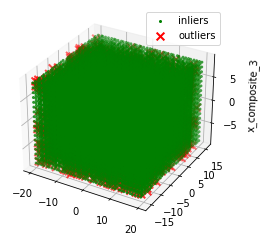

In [33]:
pca = PCA(n_components=3)
X_reduce = pca.fit_transform(data_all)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index, 0],X_reduce[outlier_index, 1], X_reduce[outlier_index, 2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [34]:
data_all = data_all[data_all['anomaly'] == 1].drop(['anomaly'], axis=1)
data_all

,ApEn,CREn,DiffEn,FI,Hjorth,Hurst,KFD,LZC,MSE,MSPEn,...,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn,Subj,film,ch,labels
0,1.484383,-0.007692,2.854492,0.314085,1.522358,0.193281,3.505953,0.742818,0.307039,0.987916,...,1.601542,0.824846,1.408808,12.906891,0.803484,0.999977,1,1,1,7.83
1,1.556828,-0.001690,2.903278,0.284743,1.503775,0.211067,3.861489,0.761305,0.302559,0.988604,...,1.616463,0.844913,1.465049,12.906891,0.818364,1.000000,1,1,2,7.83
2,1.585217,0.004273,2.883640,0.289118,1.580589,0.229094,3.410764,0.784833,0.303804,0.988171,...,1.601818,0.841968,1.506933,12.906891,0.811917,0.999577,1,1,3,7.83
3,1.636149,0.008965,2.644221,0.280260,1.584523,0.216789,3.376908,0.783152,0.313923,0.987522,...,1.614030,0.847914,1.555134,12.906891,0.817692,0.999983,1,1,4,7.83
4,1.829717,0.005163,3.007254,0.205972,1.549235,0.241468,3.858740,0.853737,0.290795,0.987040,...,1.630649,0.895176,1.777740,12.906891,0.843627,0.999926,1,1,5,7.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035,1.728836,-0.004444,2.797080,0.261082,1.665462,0.247139,3.471880,0.821806,0.317735,0.988659,...,1.606150,0.860561,1.656421,12.906891,0.831258,0.999998,32,40,14,1.88
23036,1.594800,-0.055830,3.747132,0.335007,2.043562,0.331776,3.409042,0.830209,0.259786,0.987347,...,1.596723,0.810083,1.472948,12.906891,0.760206,0.999763,32,40,15,1.88
23037,1.787636,-0.016016,4.458728,0.209458,1.710900,0.373061,3.496581,0.887349,0.231478,0.986785,...,1.601611,0.893062,1.693747,12.906891,0.794703,0.999678,32,40,16,1.88
23038,1.355464,-0.034910,3.873512,0.439351,2.366161,0.372195,2.859996,0.762985,0.248196,0.987487,...,1.547087,0.730611,1.198213,12.906891,0.711782,0.999992,32,40,17,1.88


In [37]:
#data_all.to_csv('deap_isolated.csv', index=False)
data_all = pd.read_csv('deap_isolated.csv')
data_all

,ApEn,CREn,DiffEn,FI,Hjorth,Hurst,KFD,LZC,MSE,MSPEn,...,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn,Subj,film,ch,labels
0,1.484383,-0.007692,2.854492,0.314085,1.522358,0.193281,3.505953,0.742818,0.307039,0.987916,...,1.601542,0.824846,1.408808,12.906891,0.803484,0.999977,1,1,1,7.83
1,1.556828,-0.001690,2.903278,0.284743,1.503775,0.211067,3.861489,0.761305,0.302559,0.988604,...,1.616463,0.844913,1.465049,12.906891,0.818364,1.000000,1,1,2,7.83
2,1.585217,0.004273,2.883640,0.289118,1.580589,0.229094,3.410764,0.784833,0.303804,0.988171,...,1.601818,0.841968,1.506933,12.906891,0.811917,0.999577,1,1,3,7.83
3,1.636149,0.008965,2.644221,0.280260,1.584523,0.216789,3.376908,0.783152,0.313923,0.987522,...,1.614030,0.847914,1.555134,12.906891,0.817692,0.999983,1,1,4,7.83
4,1.829717,0.005163,3.007254,0.205972,1.549235,0.241468,3.858740,0.853737,0.290795,0.987040,...,1.630649,0.895176,1.777740,12.906891,0.843627,0.999926,1,1,5,7.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19561,1.728836,-0.004444,2.797080,0.261082,1.665462,0.247139,3.471880,0.821806,0.317735,0.988659,...,1.606150,0.860561,1.656421,12.906891,0.831258,0.999998,32,40,14,1.88
19562,1.594800,-0.055830,3.747132,0.335007,2.043562,0.331776,3.409042,0.830209,0.259786,0.987347,...,1.596723,0.810083,1.472948,12.906891,0.760206,0.999763,32,40,15,1.88
19563,1.787636,-0.016016,4.458728,0.209458,1.710900,0.373061,3.496581,0.887349,0.231478,0.986785,...,1.601611,0.893062,1.693747,12.906891,0.794703,0.999678,32,40,16,1.88
19564,1.355464,-0.034910,3.873512,0.439351,2.366161,0.372195,2.859996,0.762985,0.248196,0.987487,...,1.547087,0.730611,1.198213,12.906891,0.711782,0.999992,32,40,17,1.88


In [39]:
data_ours = data_all.drop(['ch', 'film', 'Subj', 'labels'], axis=1)
ours_info = data_all[['ch', 'film', 'Subj', 'labels']].reset_index(drop=True)
data_ours

,ApEn,CREn,DiffEn,FI,Hjorth,Hurst,KFD,LZC,MSE,MSPEn,...,PLZC,PSDslope,RR,SDA,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn
0,1.484383,-0.007692,2.854492,0.314085,1.522358,0.193281,3.505953,0.742818,0.307039,0.987916,...,0.879047,1.252063,0.434671,0.403206,1.601542,0.824846,1.408808,12.906891,0.803484,0.999977
1,1.556828,-0.001690,2.903278,0.284743,1.503775,0.211067,3.861489,0.761305,0.302559,0.988604,...,0.885771,1.108984,0.492036,0.345532,1.616463,0.844913,1.465049,12.906891,0.818364,1.000000
2,1.585217,0.004273,2.883640,0.289118,1.580589,0.229094,3.410764,0.784833,0.303804,0.988171,...,0.890813,1.366841,0.482963,0.348990,1.601818,0.841968,1.506933,12.906891,0.811917,0.999577
3,1.636149,0.008965,2.644221,0.280260,1.584523,0.216789,3.376908,0.783152,0.313923,0.987522,...,0.921067,0.832467,0.501372,0.326427,1.614030,0.847914,1.555134,12.906891,0.817692,0.999983
4,1.829717,0.005163,3.007254,0.205972,1.549235,0.241468,3.858740,0.853737,0.290795,0.987040,...,0.907621,1.274496,0.681245,0.335695,1.630649,0.895176,1.777740,12.906891,0.843627,0.999926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19561,1.728836,-0.004444,2.797080,0.261082,1.665462,0.247139,3.471880,0.821806,0.317735,0.988659,...,0.916025,0.389291,0.542987,0.407120,1.606150,0.860561,1.656421,12.906891,0.831258,0.999998
19562,1.594800,-0.055830,3.747132,0.335007,2.043562,0.331776,3.409042,0.830209,0.259786,0.987347,...,0.890813,0.662599,0.397300,0.273731,1.596723,0.810083,1.472948,12.906891,0.760206,0.999763
19563,1.787636,-0.016016,4.458728,0.209458,1.710900,0.373061,3.496581,0.887349,0.231478,0.986785,...,0.860559,1.240986,0.671314,0.214236,1.601611,0.893062,1.693747,12.906891,0.794703,0.999678
19564,1.355464,-0.034910,3.873512,0.439351,2.366161,0.372195,2.859996,0.762985,0.248196,0.987487,...,0.909301,1.710071,0.248279,0.000424,1.547087,0.730611,1.198213,12.906891,0.711782,0.999992


In [40]:
from sklearn.preprocessing import MinMaxScaler
sc_ours = MinMaxScaler()
data_ours = pd.concat([pd.DataFrame(sc_ours.fit_transform(data_ours), columns=data_ours.columns).reset_index(drop=True), ours_info.reset_index(drop=True)], axis=1)
data_ours

,ApEn,CREn,DiffEn,FI,Hjorth,Hurst,KFD,LZC,MSE,MSPEn,...,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn,ch,film,Subj,labels
0,0.569391,0.686512,0.110176,0.501717,0.158510,0.165317,0.419106,0.475983,0.685905,0.660792,...,0.641094,0.583179,0.576233,0.0,0.658032,0.999533,1,1,1,7.83
1,0.626544,0.687499,0.120773,0.446288,0.146001,0.215678,0.524525,0.524017,0.669996,0.756760,...,0.695838,0.637276,0.616271,0.0,0.715000,1.000000,2,1,1,7.83
2,0.648939,0.688480,0.116507,0.454553,0.197707,0.266722,0.390882,0.585153,0.674416,0.696329,...,0.642108,0.629336,0.646088,0.0,0.690318,0.991548,3,1,1,7.83
3,0.689120,0.689252,0.064499,0.437820,0.200356,0.231880,0.380844,0.580786,0.710350,0.605823,...,0.686912,0.645366,0.680402,0.0,0.712429,0.999651,4,1,1,7.83
4,0.841826,0.688627,0.143360,0.297487,0.176602,0.301758,0.523710,0.764192,0.628223,0.538509,...,0.747885,0.772771,0.838874,0.0,0.811721,0.998528,5,1,1,7.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19561,0.762241,0.687046,0.097704,0.401591,0.254839,0.317814,0.409004,0.681223,0.723887,0.764412,...,0.658001,0.679460,0.752507,0.0,0.764365,0.999962,14,40,32,1.88
19562,0.656499,0.678592,0.304082,0.541239,0.509351,0.557466,0.390372,0.703057,0.518109,0.581442,...,0.623416,0.543385,0.621895,0.0,0.492342,0.995269,15,40,32,1.88
19563,0.808629,0.685142,0.458660,0.304072,0.285424,0.674361,0.416327,0.851528,0.417588,0.502991,...,0.641348,0.767073,0.779079,0.0,0.624415,0.993579,16,40,32,1.88
19564,0.467686,0.682034,0.331535,0.738350,0.726504,0.671911,0.227575,0.528384,0.476953,0.600866,...,0.441302,0.329148,0.426312,0.0,0.306949,0.999835,17,40,32,1.88


In [41]:
#data_ours.to_csv('deap_dataset_filtered.csv', index=False)